Normalization is a technique often applied as part of data preparation
for machine learning. The goal of normalization is to change the values of
numeric columns in the dataset to use a common scale, without distorting
differences in the ranges of values or losing information

- MinMaxScaling
- MaxAbsScaling
- RobustScaling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## MinMax Scaling
 X'=Xi-Xmin/(Xmax-Xmin)

[Datasource](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

In [2]:
data=pd.read_csv("./wine.csv")
df=data.copy()


In [3]:
df=df[['alcohol','pH','fixed acidity','chlorides','quality']]

#### Selecting only some features for normalization

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.3,random_state=111)
X_train.shape,X_test.shape

((800, 4), (343, 4))

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler()

In [7]:
X_train_scaled=scaler.transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=scaler.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
np.round(X_test_scaled.describe(),1)

,alcohol,pH,fixed acidity,chlorides
count,343.0,343.0,343.0,343.0
mean,0.4,0.5,0.3,0.1
std,0.2,0.1,0.2,0.1
min,0.0,0.1,0.0,0.0
25%,0.2,0.4,0.2,0.1
50%,0.3,0.5,0.3,0.1
75%,0.5,0.5,0.4,0.1
max,1.2,1.0,1.0,0.7


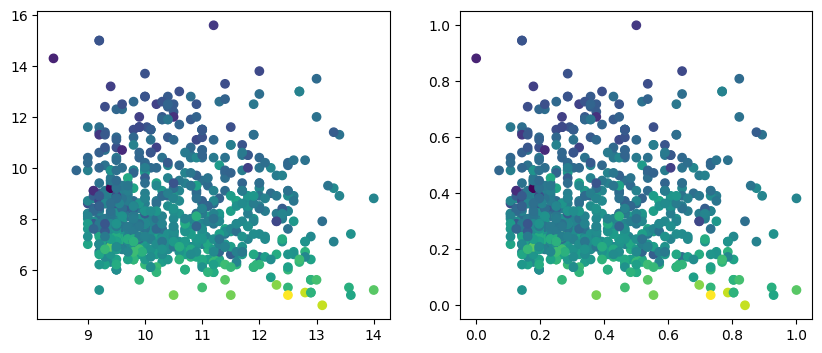

In [8]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))
ax1.scatter(x=X_train['alcohol'],y=X_train['fixed acidity'],c=X_train['pH'])
ax2.scatter(x=X_train_scaled['alcohol'],y=X_train_scaled['fixed acidity'],c=X_train_scaled['pH'])

Text(0.5, 1.0, 'After Scaling ')

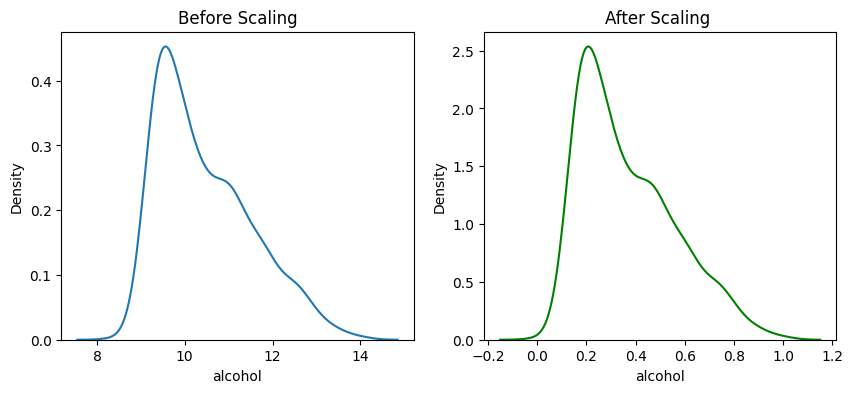

In [9]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4))
sns.kdeplot(X_train['alcohol'],ax=ax1)
ax1.set_title("Before Scaling")
sns.kdeplot(X_train_scaled['alcohol'],ax=ax2,color='green')
ax2.set_title("After Scaling ")

## MaxAbs Normalization
Xi'=Xi/(|Xmax|)

- Used for sparse data


##Robust Scaling
Xi=Xi-median/IQR

iqr=interquartile range

Robost to outliers(if data has lot of outliers)
RobostScaler


## Standardization vs Normaliazation
- Check if data requires standardization/Normalization
  - If its a classification dataset then --> No standardization/Normalization
- Check the spread of data in each columns
- Mostly standardization is used
- MinMax scaler(Normalization) is used when the max-min values are known like  image for CNN